In [26]:
import kagglehub
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Ensure NLTK tokenizer is downloaded
nltk.download('punkt')




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rohitshelke/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# Download latest version
path = kagglehub.dataset_download("doctri/microsoft-research-paraphrase-corpus")

train_dataset_path = path + "/msr_paraphrase_train.txt"
test_dataset_path = path + "/msr_paraphrase_test.txt"

# Load the dataset
train_df = pd.read_csv(train_dataset_path, sep='\t', header=0, on_bad_lines='skip')
test_df = pd.read_csv(test_dataset_path, sep='\t', header=0, on_bad_lines='skip')

In [28]:
# Drop unnecessary columns
train_df = train_df[["Quality", "#1 String", "#2 String"]]
test_df = test_df[["Quality", "#1 String", "#2 String"]]

# Ensure no missing values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df["Quality"] = train_df["Quality"].astype(int)
test_df["Quality"] = test_df["Quality"].astype(int)

In [29]:
# Extract sentence pairs and labels
train_sentences1 = train_df["#1 String"].values
train_sentences2 = train_df["#2 String"].values
y_train = train_df["Quality"].values

test_sentences1 = test_df["#1 String"].values
test_sentences2 = test_df["#2 String"].values
y_test = test_df["Quality"].values

In [30]:
# TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(np.concatenate((train_sentences1, train_sentences2)))  # Fit on training data

# Transform sentences into TF-IDF vectors
X_train1 = vectorizer.transform(train_sentences1)
X_train2 = vectorizer.transform(train_sentences2)
X_test1 = vectorizer.transform(test_sentences1)
X_test2 = vectorizer.transform(test_sentences2)

In [31]:
# Compute cosine similarity (feature for classification)
X_train = np.array([cosine_similarity(X_train1[i], X_train2[i])[0][0] for i in range(len(train_sentences1))]).reshape(-1, 1)
X_test = np.array([cosine_similarity(X_test1[i], X_test2[i])[0][0] for i in range(len(test_sentences1))]).reshape(-1, 1)

In [32]:
# Train logistic regression classifier
clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression()

In [33]:
# Test model
y_pred = clf.predict(X_test)

<Figure size 640x480 with 0 Axes>

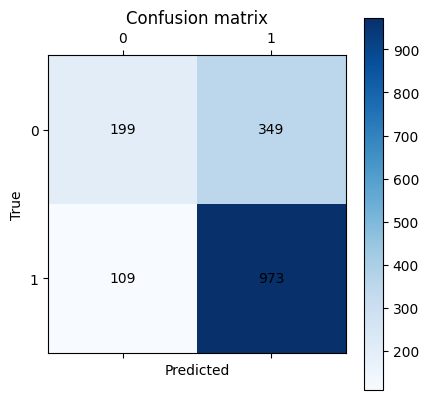

In [34]:
# Accuracy
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.matshow(cm, cmap='Blues')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# Add numbers in the confusion matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(x=j, y=i, s=cm[i, j], ha='center', va='center', color='black')

plt.colorbar()
plt.show()

In [35]:
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

           0       0.65      0.36      0.46       548
           1       0.74      0.90      0.81      1082

    accuracy                           0.72      1630
   macro avg       0.69      0.63      0.64      1630
weighted avg       0.71      0.72      0.69      1630

